# <font  color = "#0093AF"> Quadrupolar exchange

Membrane properties are often characterized by measurement of residual dipole or quadrupole couplings. For example, the $^2$H quadrupole spliting (difference between maxima) in a membrane aliphatic chain is approximately 170 kHz when rigid, but symmetric rotation about the membrane normal already reduces that value by half. Additional motion reduces this value further, yielding a order parameters (scaling factors) fro 0.01-0.2 in pure POPC.

In more complex membranes, it can be the case that lipids exchange environments, leading to complex lineshapes coming from both environments, with potential broadening depending on the rate of exchange.

## Setup

In [1]:
# SETUP SLEEPY
import os
os.chdir('../../../')

In [2]:
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt

## Build the system

In [3]:
ex0=sl.ExpSys(v0H=600,Nucs='2H',vr=0,pwdavg='bcr400')
ex0.set_inter('quadrupole',i=0,delta=170e3*.15)
ex1=ex0.copy()
ex1.set_inter('quadrupole',i=0,delta=170e3*.3)

L=sl.Liouvillian(ex0,ex1,kex=sl.Tools.twoSite_kex(tc=5e-5,p1=.5))

## Propagate the system, plot

State-space reduction: 18->4


<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

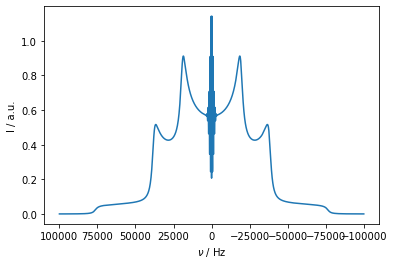

In [4]:
seq=L.Sequence(Dt=5e-6)
rho=sl.Rho('2Hx','2Hp')

rho.DetProp(seq,n=4096)
rho.apod_pars['WDW']='em'
rho.apod_pars['LB']=100
rho.plot(FT=True,apodize=True)

Note the central frequency comes from couplings oriented near the magic angle, where the change in the size of the quadrupole coupling has little influence on the resonance frequency, and so very little relaxation is induced at these orientations. 

If we change the exchange rate, we go between regimes having two distinct shapes and a fully averaged shape.

State-space reduction: 18->4
State-space reduction: 18->4


<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

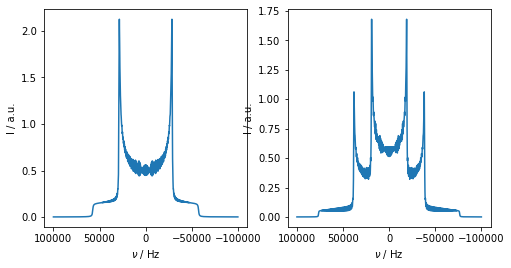

In [5]:
#seq=L.Sequence(Dt=5e-6)

fig,ax=plt.subplots(1,2)
fig.set_size_inches([8,4])

L.kex=sl.Tools.twoSite_kex(tc=1e-7)

rho=sl.Rho('2Hx','2Hp')

rho.DetProp(seq,n=4096)
rho.apod_pars['WDW']='em'
rho.apod_pars['LB']=500
rho.plot(FT=True,apodize=True,ax=ax[0])

L.kex=sl.Tools.twoSite_kex(tc=1e-1)

rho=sl.Rho('2Hx','2Hp')

rho.DetProp(seq,n=4096)
rho.apod_pars['WDW']='em'
rho.apod_pars['LB']=500
rho.plot(FT=True,apodize=True,ax=ax[1])

## How does coupling depend on spin?

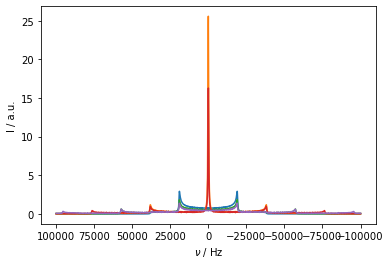

In [6]:
ex=sl.ExpSys(v0H=600,Nucs='2H',vr=0,pwdavg='bcr400',LF=True).set_inter('quadrupole',i=0,delta=170e3*.15)
ax=plt.subplots()[1]

for S in [1,3/2,2,5/2,3]:
    ex.Op=sl.SpinOp([S]) #Manually replace the spin-operators to get a higher spin-system with same gamma
    seq=ex.Liouvillian().Sequence(Dt=5e-6)
    rho=sl.Rho('2Hx','2Hp')
    rho.DetProp(seq,n=4096)
    rho.apod_pars['WDW']='em'
    rho.apod_pars['LB']=500
    rho.downmix()
    rho.plot(FT=True,apodize=True,ax=ax)

In [7]:
170e3*.15*np.sqrt(2/3)

20820.662813657014

State-space reduction: 9->2


<IPython.core.display.Javascript object>


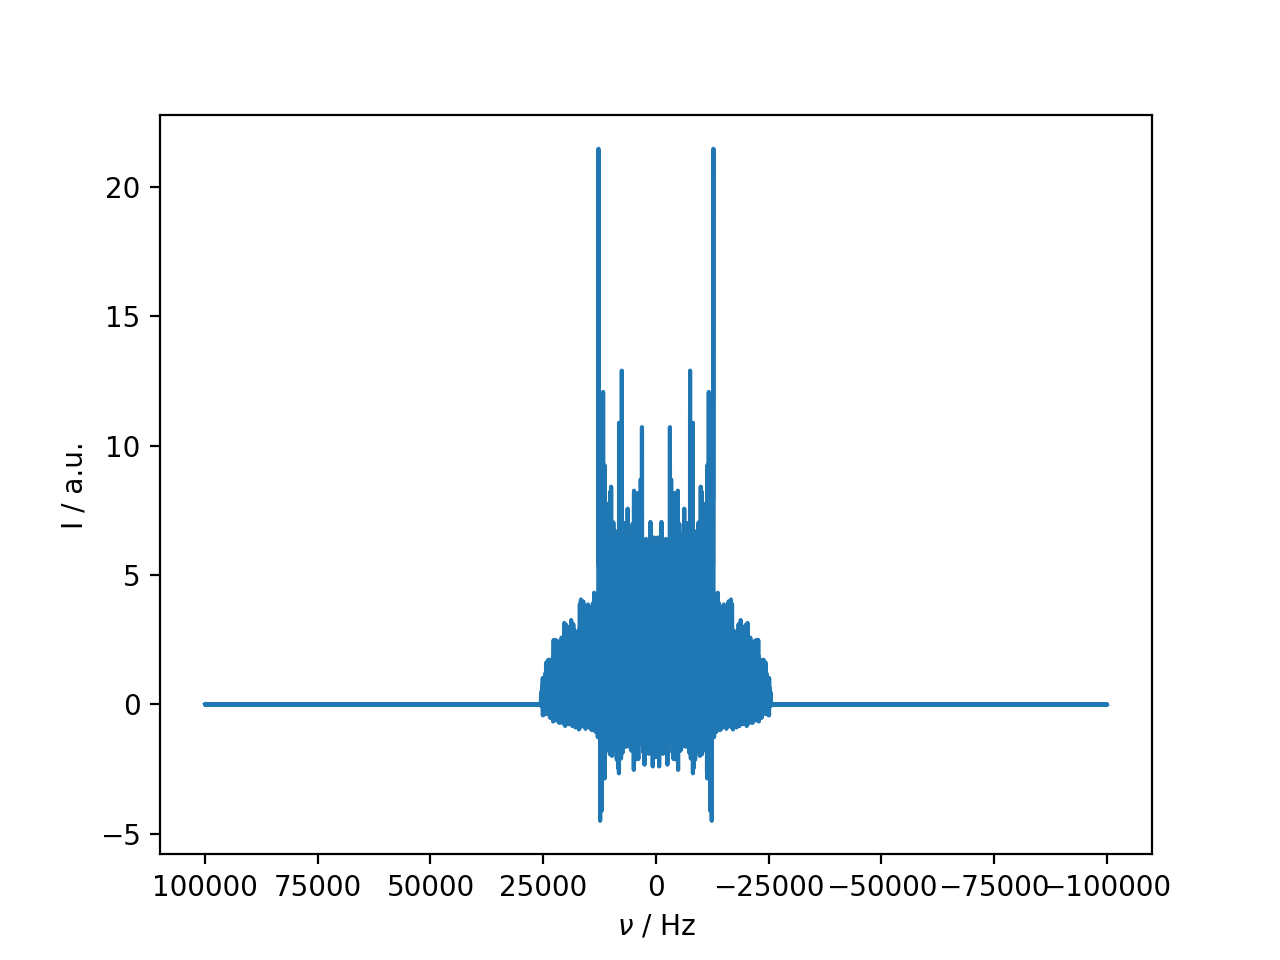

<AxesSubplot:xlabel='$\\nu$ / Hz', ylabel='I / a.u.'>

In [10]:
ex=sl.ExpSys(v0H=600,Nucs='2H',vr=0,pwdavg='bcr400').set_inter('quadrupole',i=0,delta=170e3*.1)
seq=ex.Liouvillian().Sequence(Dt=5e-6)
rho=sl.Rho('2Hx','2Hp')
rho.DetProp(seq,n=4096)
rho.plot(FT=True)

In [76]:
12750/17000

0.75

In [9]:
%matplotlib notebook

In [11]:
25500+12750

38250